In [163]:
# Assigment 2
# Fanny Rocio Tutillo

# 1. Data Loading and Initial Exploration:
#Import libraries
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load dataset using seaborn library
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

# Reviewing missing values
missing_values = df_titanic.isnull().sum()
print(missing_values)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [164]:
# 2. Exploratory Data Analysis (EDA):
# Calculate summary statistics (mean, median, standard deviation, etc.) for numerical columns.
median_age = df_titanic['age'].median()
df_titanic['age'].fillna(median_age, inplace=True)
print(df_titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


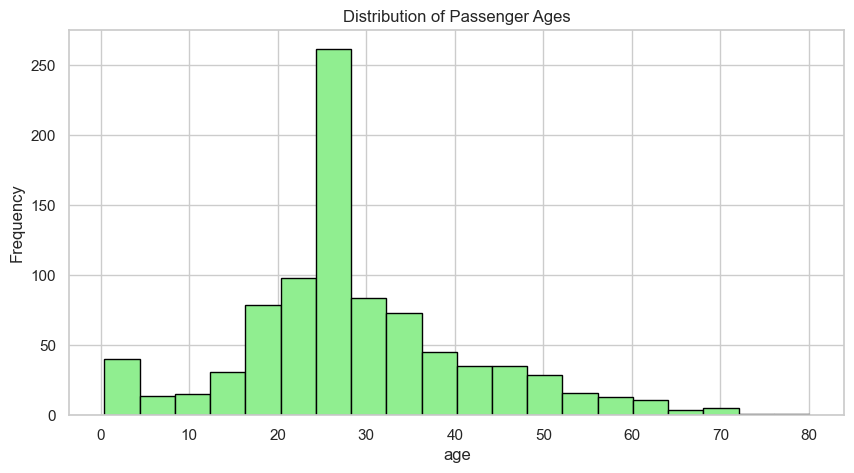

In [165]:
# Explore the distribution of passenger ages using a histogram.
plt.figure(figsize=(10, 5))
plt.hist(df_titanic['age'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()



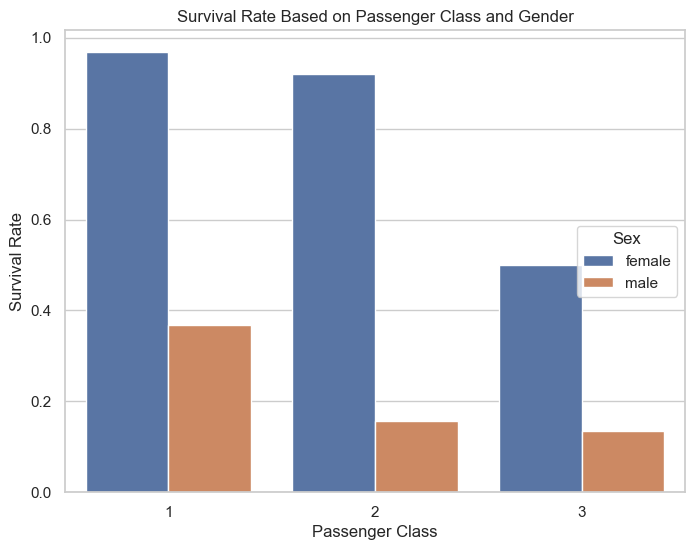

In [166]:
# Analyze survival rate based on passenger class (Pclass) and gender (Sex)
survival_rate_by_class_sex = df_titanic.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

# Create a bar plot using seaborn library and use matplotlib for labels and legend
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=survival_rate_by_class_sex)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Passenger Class and Gender')
plt.legend(title='Sex', loc='right')
plt.show()

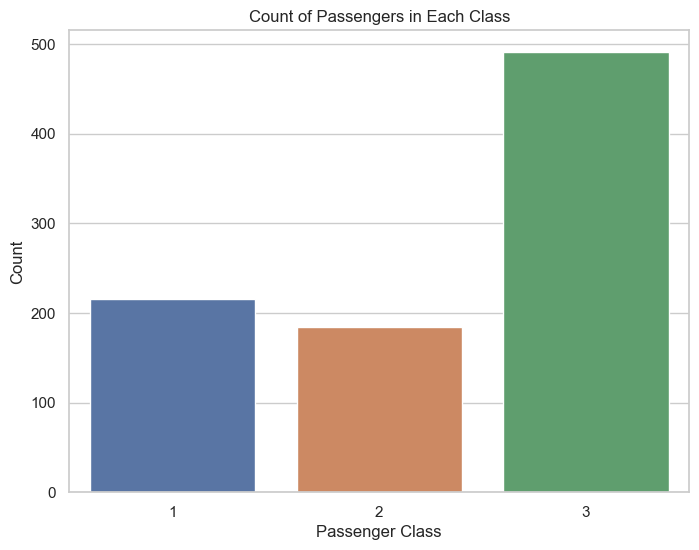

In [167]:
# 3. Data Visualization
sns.set(style="whitegrid")

# Create a bar plot to show the count of passengers in each class (pclass)
# I Created a bar plot using seaborn library and use matplotlib for labels and legend
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Passengers in Each Class')
plt.show()


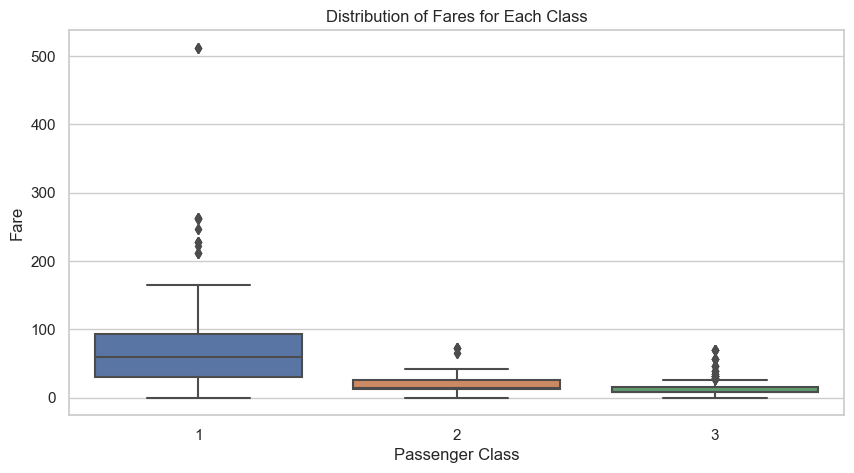

In [168]:
# Generate a box plot to visualize the distribution of fares (Fare) for each class
# Create a box plot using seaborn library and use matplotlib for labels and legend
plt.figure(figsize=(10, 5))
sns.boxplot(x='pclass', y='fare', data=df_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Distribution of Fares for Each Class')
plt.show()


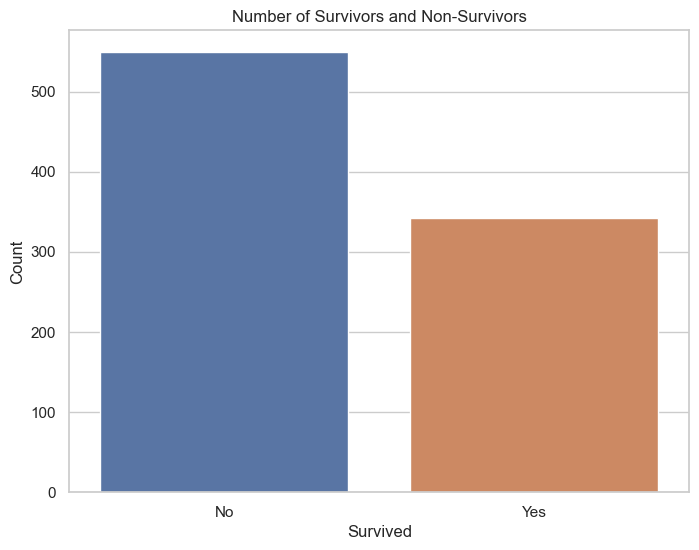

In [169]:
# Create a count plot to show the number of survivors and non-survivors
# Create a count plot using seaborn library and use matplotlib for labels and legend
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df_titanic)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Number of Survivors and Non-Survivors')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.show()

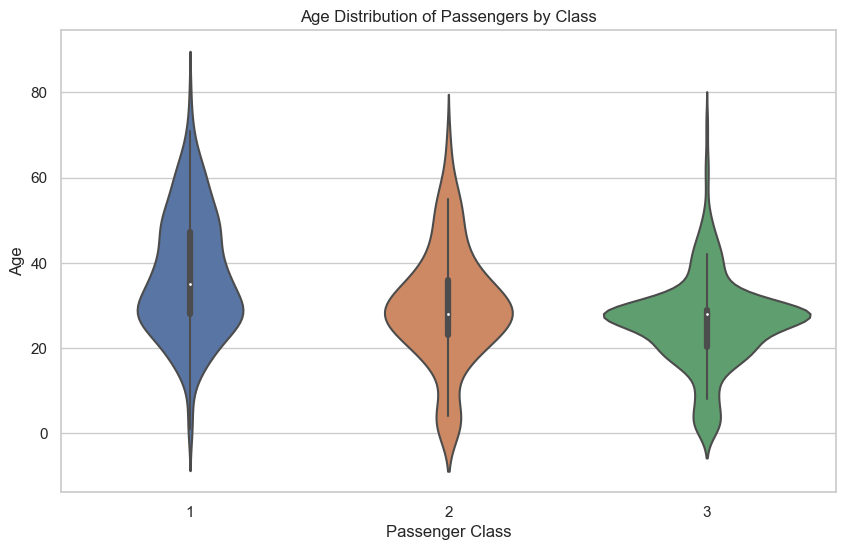

In [170]:
# 4. Advanced Visualization:
# Create a violin plot to compare the age distribution of passengers across different classes
# Create a violinplot using seaborn library and use matplotlib for labels and legend
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', data=df_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution of Passengers by Class')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


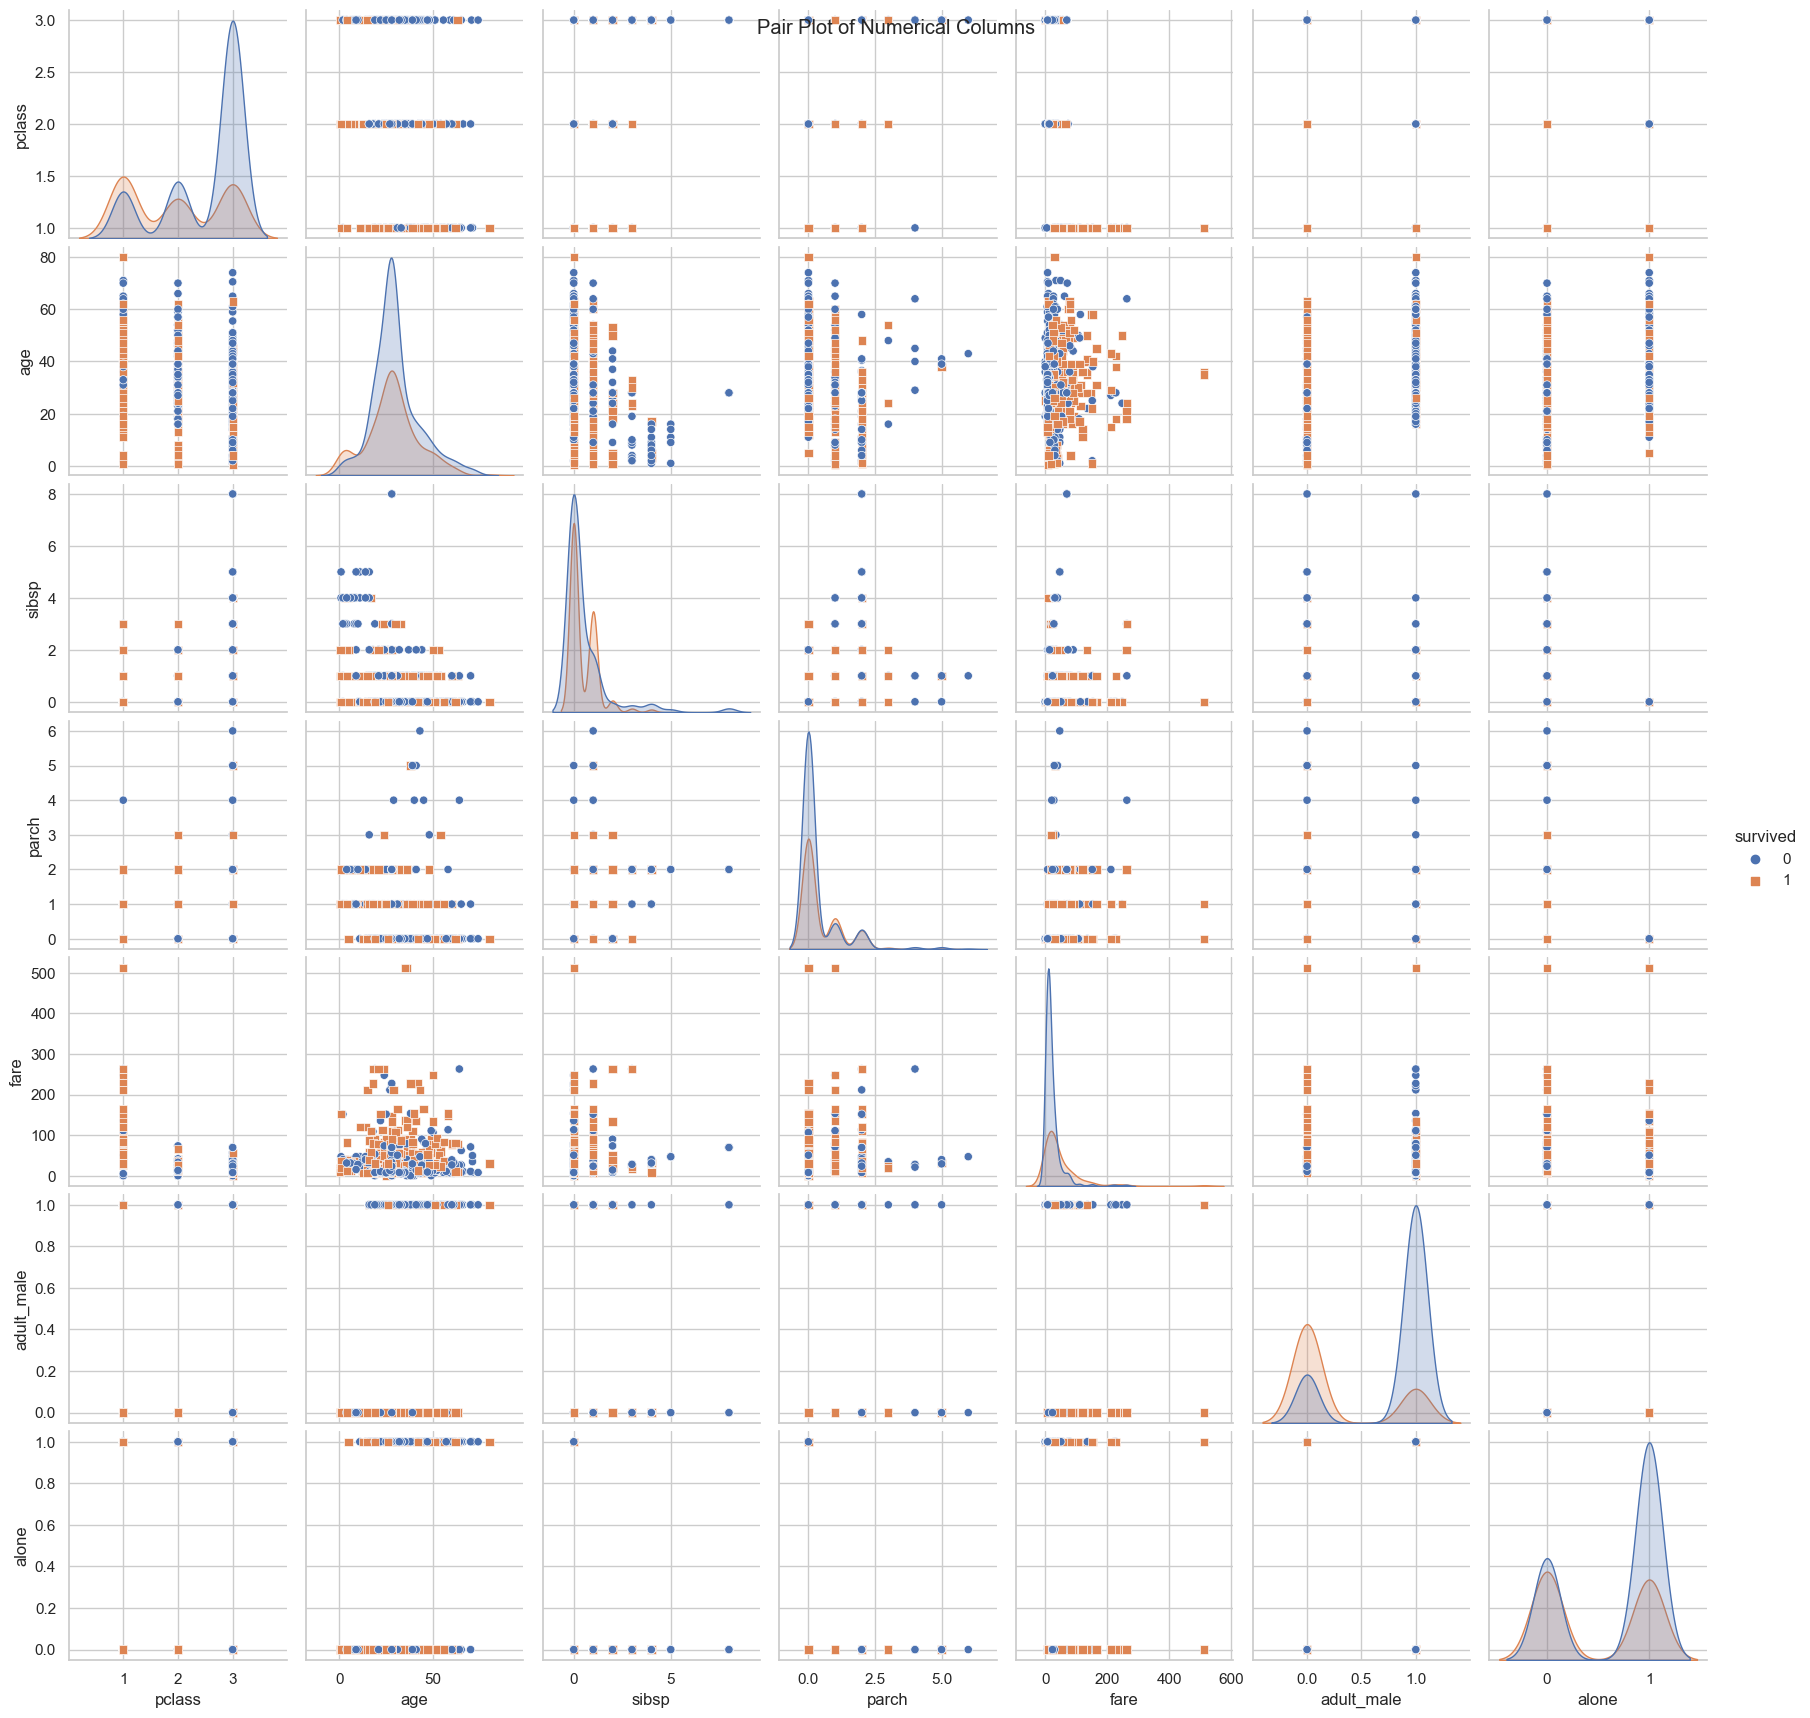

In [171]:
# Generate a pair plot to explore relationships between numerical columns
# Create a pair plot using seaborn library and use matplotlib for labels and legend
sns.pairplot(df_titanic, hue='survived', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()

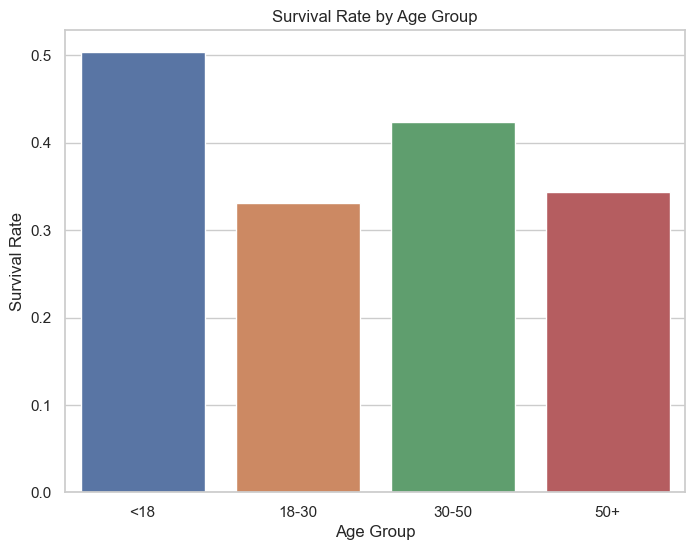

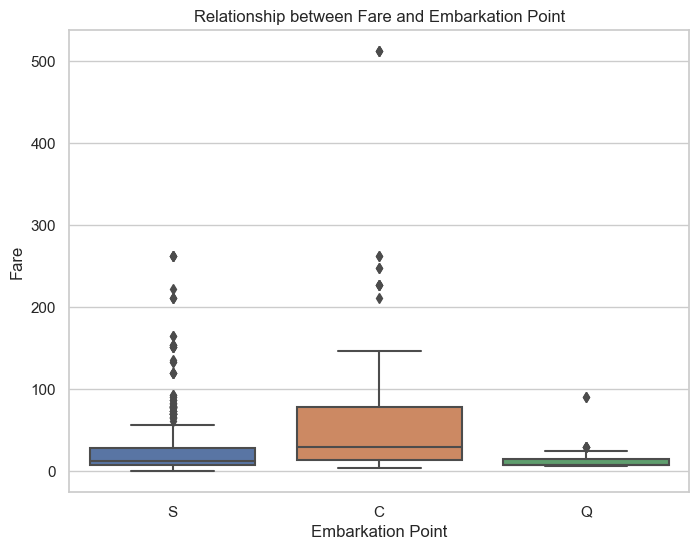

In [172]:
# Optional Challenge:
# Create a new column 'age_group' to categorize passengers into age groups
age_bins = [0, 18, 30, 50, 80]
age_labels = ['<18', '18-30', '30-50', '50+']
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=age_bins, labels=age_labels)

# Compare survival rates among different age groups
age_survival = df_titanic.groupby('age_group')['survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

# Analyze the relationship between fare and embarkation point
plt.figure(figsize=(8, 6))
sns.boxplot(x='embarked', y='fare', data=df_titanic)
plt.xlabel('Embarkation Point')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Embarkation Point')
plt.show()

# Conclusion
# The most of survivors was woman and less than 18 yearl old.
#